# Plots

In [1]:
library('dplyr')
library('ggplot2')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### Syntax

- ggplot2 works with dataframes<br>
- it uses layers to build a final plot
- Cheatsheat: https://github.com/rstudio/cheatsheets/blob/main/data-visualization-2.1.pdf

## ggplot()

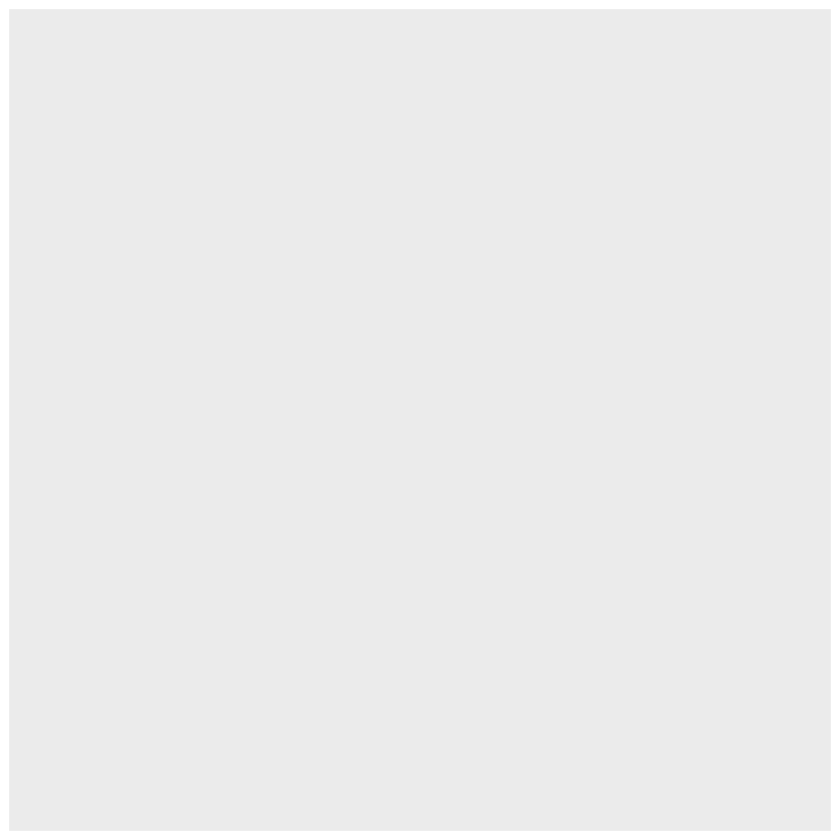

In [ ]:
# creates an empty graph, dataframe, data selection, type of graphing and aestethics need to be added
ggplot()

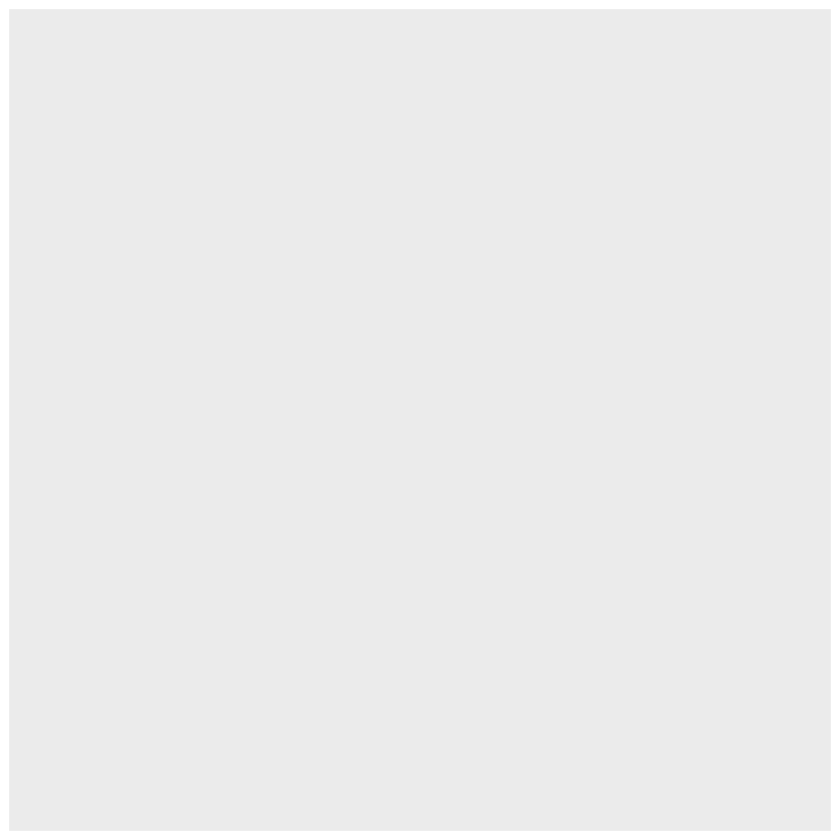

In [ ]:
# now the dataframe was added, but we need to specify what columns and what type of graph we want to see
mtcars %>% ggplot()

aes() defines an aesthetic mappings<br>
describes what data and how these variables are mapped to geoms<br>
can be used in ggplot() or geoms

- x, y values
- color, fill - names of colors or colors in hexa codes
- linetype - int or string 0-6 values
- size
- shape

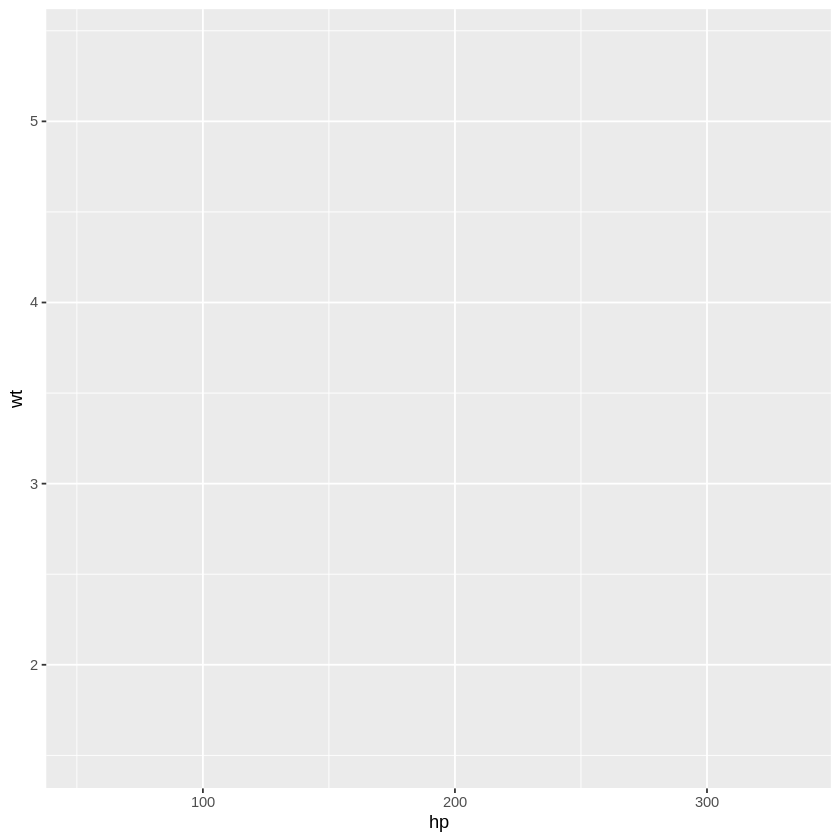

In [ ]:
# here the x and y was specified through parametr aes()
# but still nothing can be seen in the plot, we actualy just added axes
mtcars %>% ggplot(aes(x=hp,y=wt))

## Specifiyng geoms

To be able to actualy see the data in the plot <br>
we need to specify a type of visualisation 

### Two variables
- geom_point()
- geom_line()
- geom_smooth(method=) 
- geom_text()
- geom_label()
- geom_quantile()

### One variable
- geom_bar # default stat = 'count'
- geom_col() # default stat = 'identity'
- geom_area()
- geom_density()
- geom_histogram()
- geom_qq()

### Statistical tools
- geom_boxplot()
- geom_violin()
- geom_errorbar()
- geom_linerange()

## Stats
An alternative way how to work with data and prepare them for plotting<br>
- geom_bar(stat='identity)
- stat_geom(stat='summary', fun='max')

### vs

- stat_count()
- stat_identity()
- stat_summary(data.fun='mean', ....)


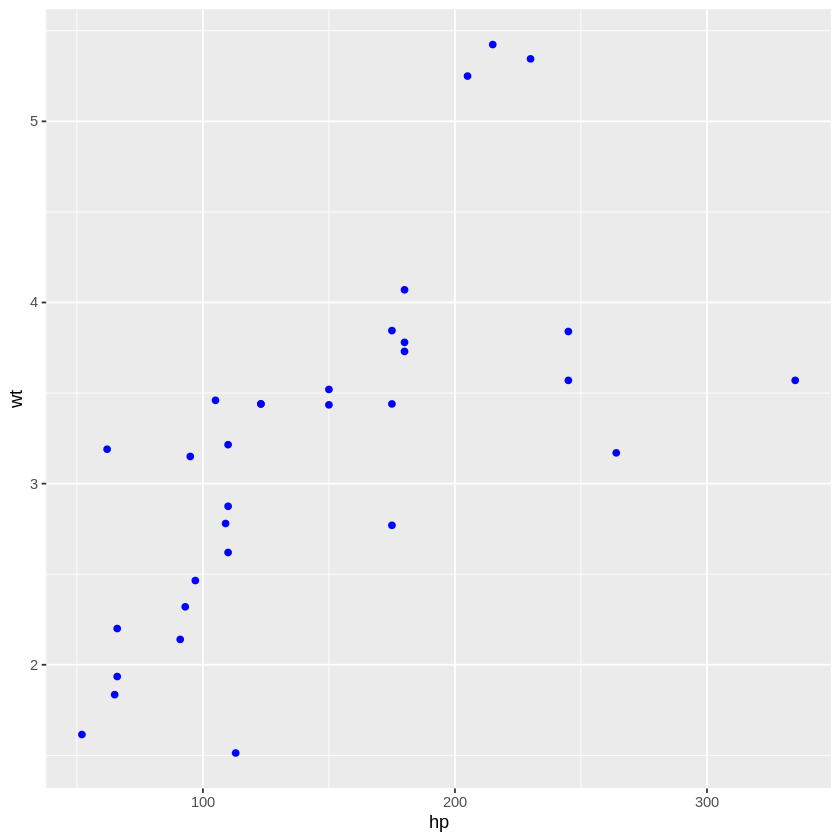

In [2]:
mtcars %>% ggplot(aes(x=hp, y=wt,)) + geom_point(color='blue')

`geom_smooth()` using formula 'y ~ x'



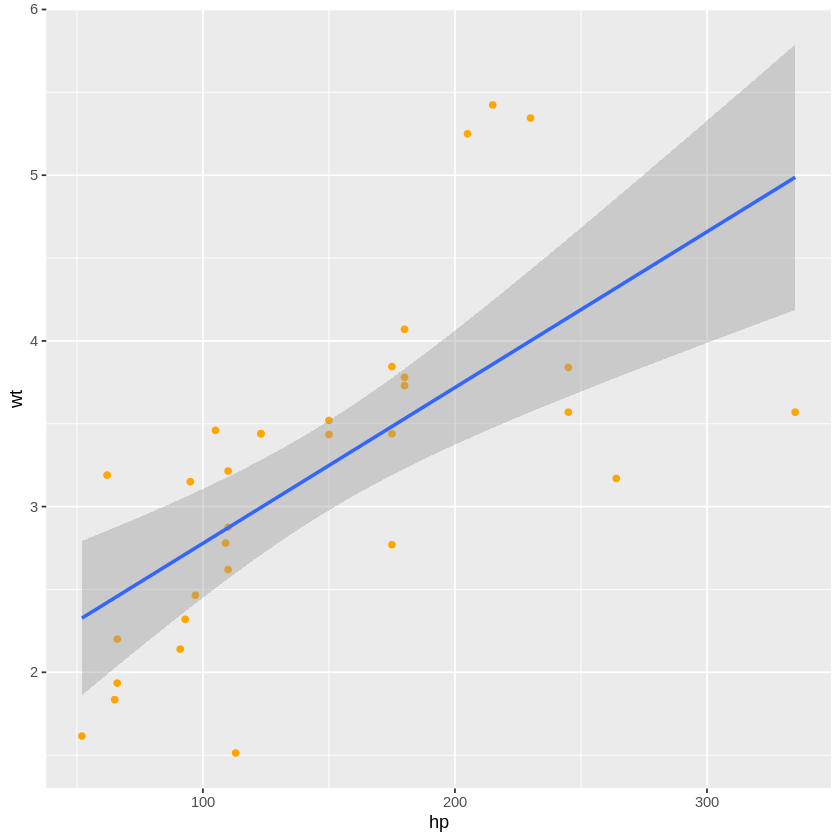

In [3]:
g <- mtcars %>% ggplot(aes(x=hp, y=wt,)) + 
               geom_point(color='orange') + 
               geom_smooth(method="lm")
plot(g)

In [ ]:
# Exercise 1:
# Create a scatter plot for iris dataset
# plot Petal.length vs Petal.Width and color datapoints by Species 

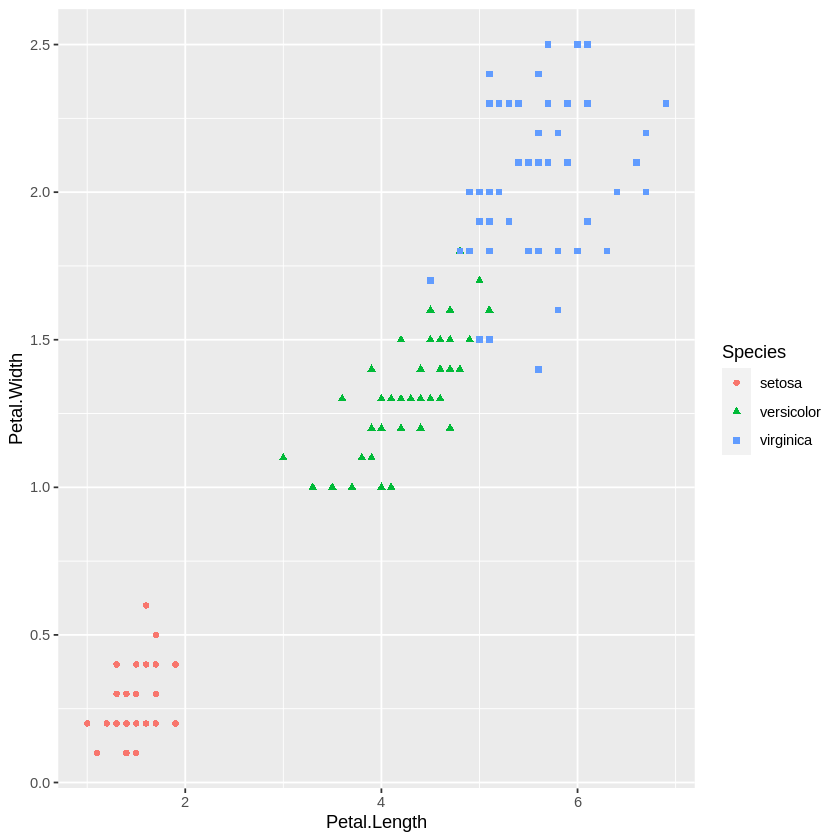

In [ ]:
g = ggplot(iris, aes(Petal.Length, Petal.Width)) + 
    geom_point(aes(color=Species, shape=Species))

plot(g)

In [ ]:
# Exercise 2
# Create a barplots of the mean values for the Sepal or Petal of your choice in the iris dataset

# hint: Species on the x axis, mean on the y axis

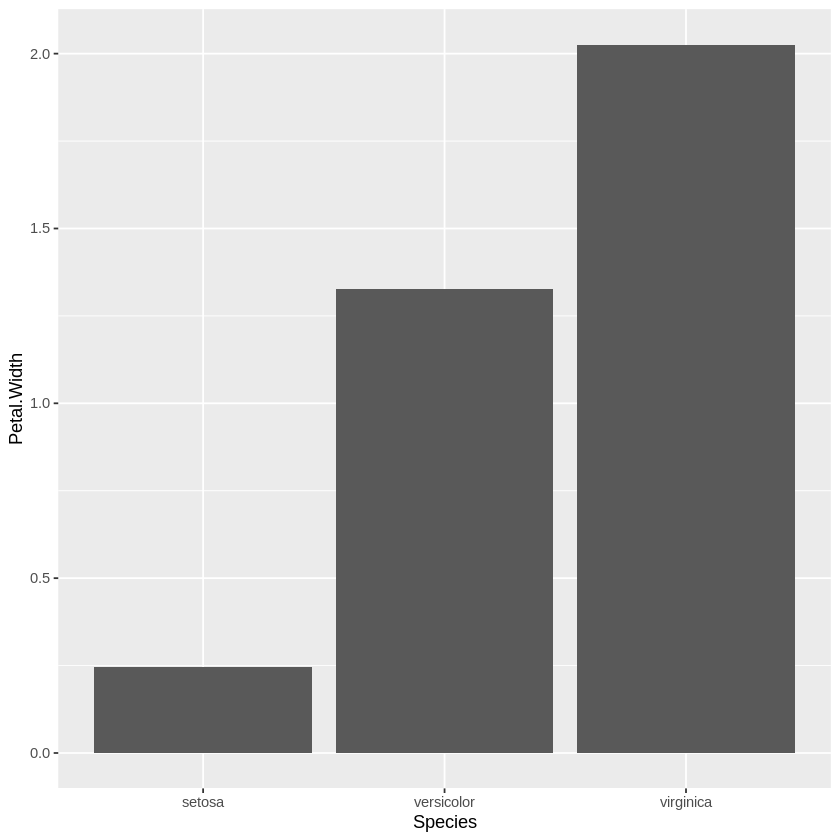

In [ ]:
df_iris_agg <- aggregate(iris[,1:4], by=list(iris$Species), FUN=mean)
df_iris_agg <- df_iris_agg %>% rename(Species = Group.1) 
ggplot(df_iris_agg, aes(x=Species, y=Petal.Width)) +
       geom_col()

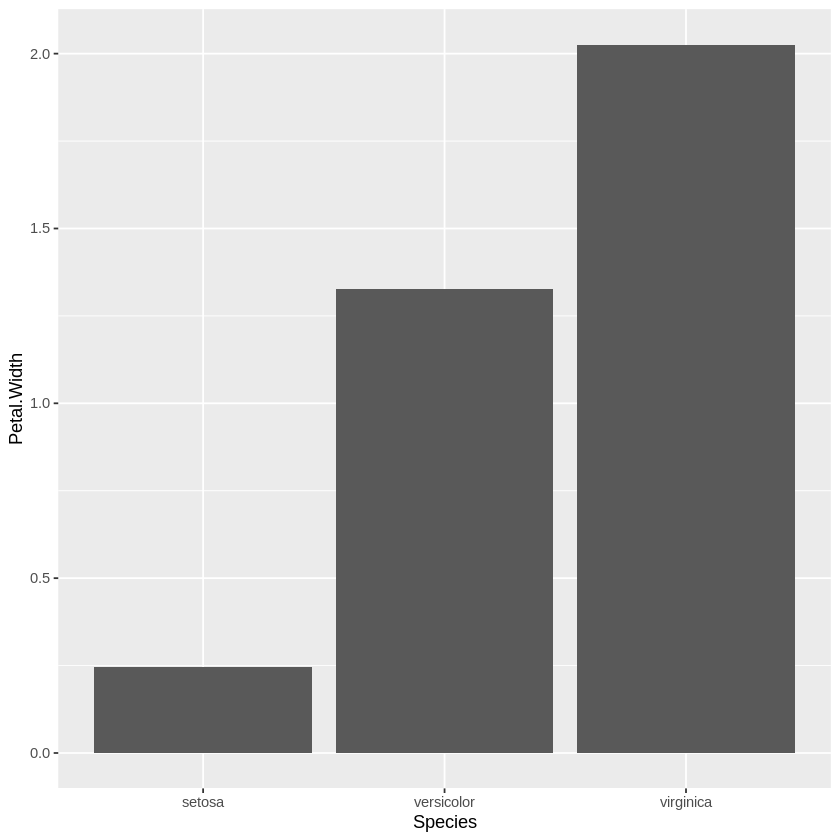

In [ ]:
# or using geom bar and stats
ggplot(iris, aes(x=Species, y=Petal.Width)) +
       geom_bar(stat='summary', fun.data='mean')

### Error bars

In [ ]:
Group_v <- c('A', 'B', 'C', 'D', 'E')
Mean_v <- c(27, 35, 29, 25, 28)
SD_v <- c(2, 3, 4, 3, 2)
dummy_df <- data.frame(Group_v, Mean_v, SD_v)
dummy_df

Group_v,Mean_v,SD_v
<chr>,<dbl>,<dbl>
A,27,2
B,35,3
C,29,4
D,25,3
E,28,2


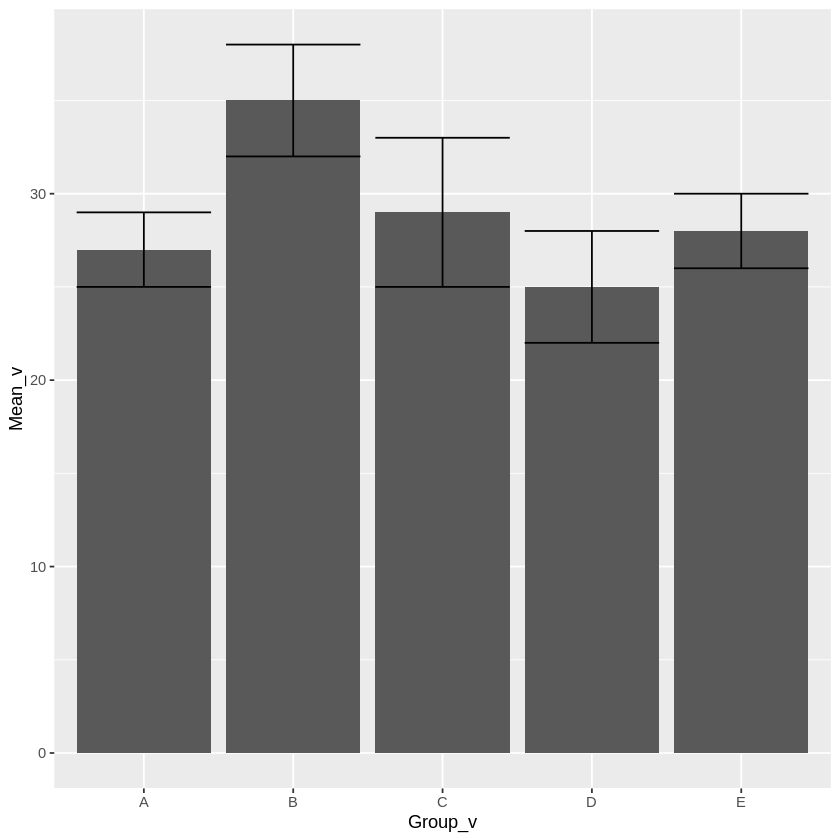

In [ ]:
ggplot(dummy_df,aes(Group_v,Mean_v)) + geom_bar(stat="identity") + 
                                       geom_errorbar(aes(x=Group_v, ymin=Mean_v-SD_v, ymax=Mean_v+SD_v))

In [ ]:
# Exercise 2
# Create a violin plots for each country for the following dataset
# 'https://web.vscht.cz/~spiwokv/statistika/doziti.txt'
# hint: Countries on the x axis, mean on the y axis

## Melting the data frame

In [ ]:
install.packages('reshape2')
# https://cran.r-project.org/web/packages/reshape2/reshape2.pdf

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’




In [ ]:
library('reshape2')

URL = 'https://web.vscht.cz/~spiwokv/statistika/doziti.txt'
data <- read.csv(URL, sep=' ')

df_melted <- melt(data[,2:5], 
                  variable.name='Country',
                  value.name='life_expectancy')
head(df_melted)

No id variables; using all as measure variables



,Country,life_expectancy
,<fct>,<dbl>
1,Switzerland,71.31341
2,Switzerland,71.64488
3,Switzerland,71.19610
4,Switzerland,71.18756
5,Switzerland,72.07780
6,Switzerland,72.20171


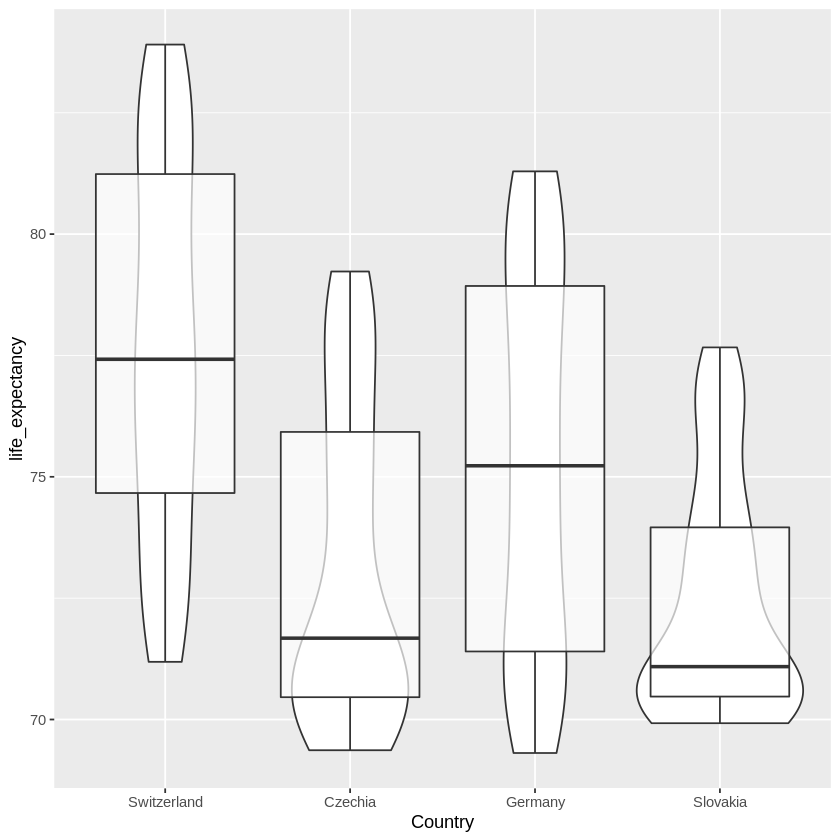

In [ ]:
ggplot(df_melted, aes(x=Country, y=life_expectancy)) + geom_violin() + geom_boxplot(alpha=0.7)

In [ ]:
# Lets plot the iris again
# this time all variables in one graph
# again Species on X axis, mean values on y axis

In [ ]:
# 1) aggregate the data by species and melt them into new dataframe
# 2) plot the data using geom_bar and position='dodge' parameter

In [ ]:
df_iris_agg_melted <- melt(df_iris_agg, id.vars=c('Species'))
df_iris_agg_melted

Species,variable,value
<fct>,<fct>,<dbl>
setosa,Sepal.Length,5.006
versicolor,Sepal.Length,5.936
virginica,Sepal.Length,6.588
setosa,Sepal.Width,3.428
versicolor,Sepal.Width,2.770
virginica,Sepal.Width,2.974
setosa,Petal.Length,1.462
versicolor,Petal.Length,4.260
virginica,Petal.Length,5.552


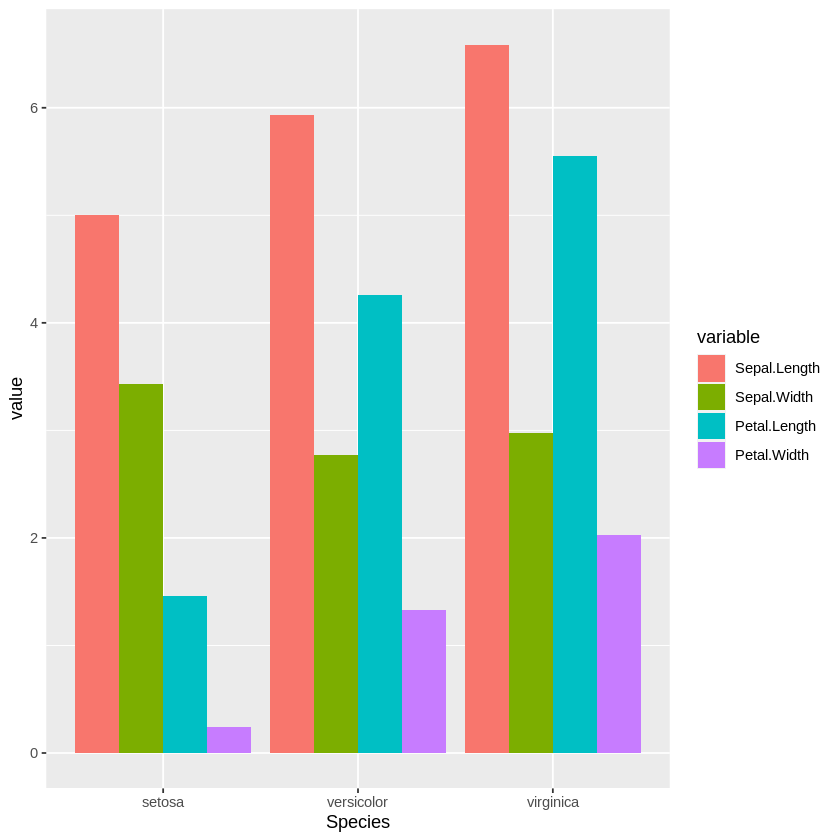

In [ ]:
g <- ggplot(df_iris_agg_melted, aes(x=Species, y=value, group=variable, fill=variable)) +
            geom_bar(stat='summary', fun.data='mean', position='dodge')

plot(g)

# Plot Customizations

- labs()
    - title, subtitle, caption, x, y
- theme(): size, color, hjust, wjust, face, family (font)
    - plot.title=element_text()
    - plot.subtitle=element_text()
    - plot.caption=element_text()
    - axis.title.x=element_text()
    - axis.title.y=element_text()
    - axis.text.x = element_text()
- themes: https://ggplot2.tidyverse.org/reference/ggtheme.html

In [ ]:
# Exercise 3
# Get data: https://web.vscht.cz/~spiwokv/statistika/fas.txt
# index is number of measurement, the first column are height of fathers the second one are heights of their sons in inches
# Plot two histograms each for one column, set name of the plot, size of x and y labels

In [ ]:
install.packages('ggthemes')
library('ggthemes')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map




In [ ]:
URL <- 'https://web.vscht.cz/~spiwokv/statistika/fas.txt'
df_fs_heights <- read.csv(URL, sep=' ')
head(df_fs_heights)

,num,fheight,sheight
,<int>,<dbl>,<dbl>
1,1,65.04851,59.77827
2,2,63.25094,63.21404
3,3,64.95532,63.34242
4,4,65.75250,62.79238
5,5,61.13723,64.28113
6,6,63.02254,64.24221


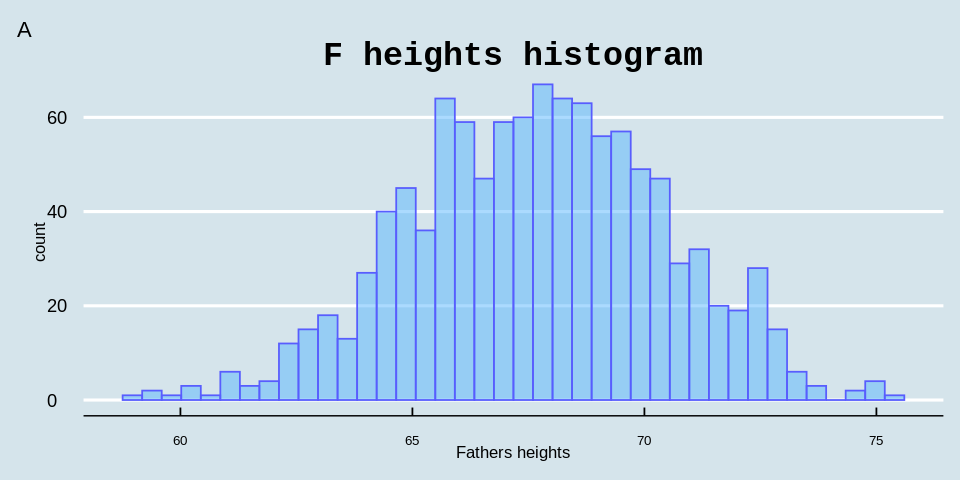

In [ ]:
p1 <- ggplot(df_fs_heights, aes(fheight)) + geom_histogram(bins=40, color='#585DFE', fill='#58B5FE', alpha=0.5) +
                                            theme_economist() +
                                            labs(title='F heights histogram',
                                                 x='Fathers heights', tag='A') +  # adding tag for multiple plots figure
                                            theme(plot.title=element_text(size=20, face='bold', hjust=0.5, family='CM Roman'),                                                  
                                                  axis.title.x=element_text(size=10),
                                                  axis.title.y=element_text(size=10),
                                                  axis.text.x = element_text(size=8))

plot(p1)

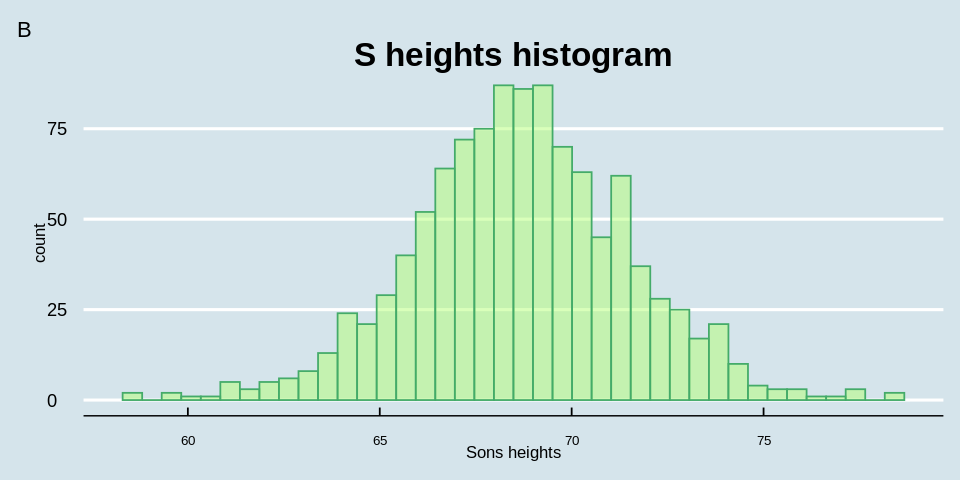

In [ ]:
p2 <- ggplot(df_fs_heights, aes(sheight)) + geom_histogram(bins=40, color='#44AB69', fill='#B3FF77', alpha=0.5) +
                                            theme_economist() +
                                            labs(title='S heights histogram',
                                                 x='Sons heights', tag='B') +
                                            theme(plot.title=element_text(size=20, face='bold', hjust=0.5),                                                  
                                                  axis.title.x=element_text(size=10),
                                                  axis.title.y=element_text(size=10),
                                                  axis.text.x = element_text(size=8))

plot(p2)

## Arranging graphs into one figure


In [ ]:
install.packages('cowplot')
library('cowplot')
# https://wilkelab.org/cowplot/articles/plot_grid.html

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



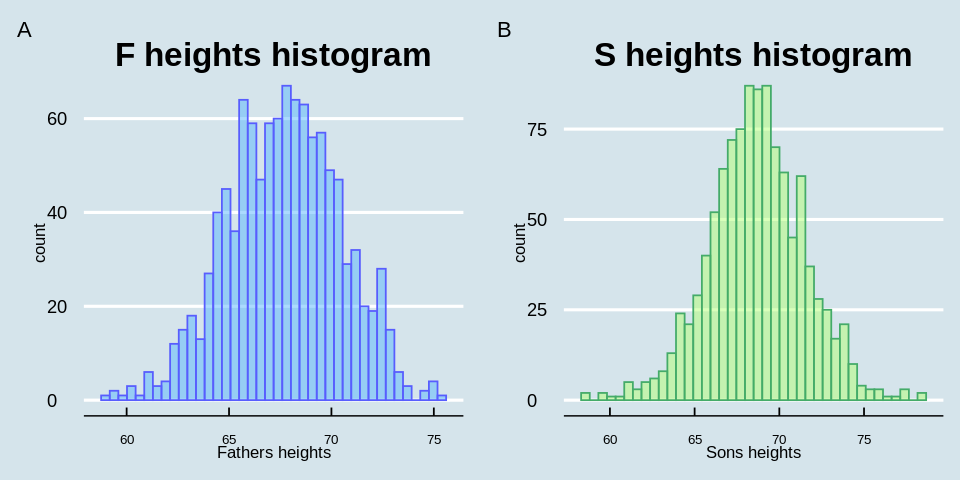

In [ ]:
options(repr.plot.width=8, repr.plot.height=4)
p <- plot_grid(p1, p2, labels='')# labels='AUTO' for adding tags
plot(p)
ggsave('hists.png', dpi=300, width=8, height=4)

# Plot Size and Resolution

Image is represented as a matrix of points. <br>
When saving image with ggplot2, we are specifying size of the image in inches and dpi - dots per inch.<br>
Inches are related to size of the picture when printed on paper. DPI is the resolution of the image raster.<br>
Where is the problem?<br>
Let's say we save one picture 3 x 2 inches with 300 dpi, and then second one 3x 2 inches with 150 dpi. We would open them to compare them and the one with higher dpi is bigger, how come?<br>
The problem is we have to consider resolution of our screen as well. The picture is saved as a matrix of points, if the resolution is bigger, the matrix will be bigger. When printed on the paper the size of the images will be the same, but the density of the point will be different. But on the monitor we can not change the density of the points, they are physicaly there. So the picture with higher density will look much bigger, because picture matrix is bigger.<br>
But don't get confused by this, remember resolution in DPI tells us how detailed a picture is. Size in inches is related to size of the picture once printed.<br>
Another problem can pose text size, defaultly in pt = points. One pt is ~ .035 cm or ~ .013 in, so if the title of the picture is size of 10 pt, then when printed the title will be 3.5 mm high. But again on your monitor it may look too small or too big, depending on the resolution of your screen. There is one catch in themes size of the text is in points, but in geom_text size is defined in mm. To bring some more confusion, physical points a monitor is made of are called pixels, conversion between pixels and points is 1 pixel = 0.75 points.<br><br>
Example: <br>
Monitor resolution is 5120 x 1440, 109 pixels/inch<br>
Picture resolution is 150 DPI<br>
Picture size is 3 x 2 inches<br>
Text size is 10 pt<br><br>
What resolution will have the resulting picture?<br>
3x150 = 450 <br>
2x150 = 300 <br>
450x300 will be the resolution of the picture<br><br>
How big will be picture on the screen (in inches)?<br>
450/109 = 4.12 inches <br>
300/109 = 2.75 inches <br>
4.12 x 2.75 inches will be the size of the picture on the screen<br><br>

What if we change the resolution to 300 DPI<br>
How big will be this picture on the screen?<br>
3x300 => 900/109 => 8.26 inches
2x300 => 600/109 => 6.42 inches 
8.26 x 6.42 will be the size of the picture on the screen <br>

Size of the printed picture for both cases 150 or 300 DPI will remain the same, that is 3 x 2 inches. But the resolution, density of the grid will be different.


### Dealing with pt and mm in ggplot
ggplot uses .pt constant for conversion: pt = 2.845276<br>
mm = pt / .pt -> 15 / 2.845276 = 5.27 <br>
pt = mm \* .pt -> 5.27 \* 2.845276 = 15 <br>


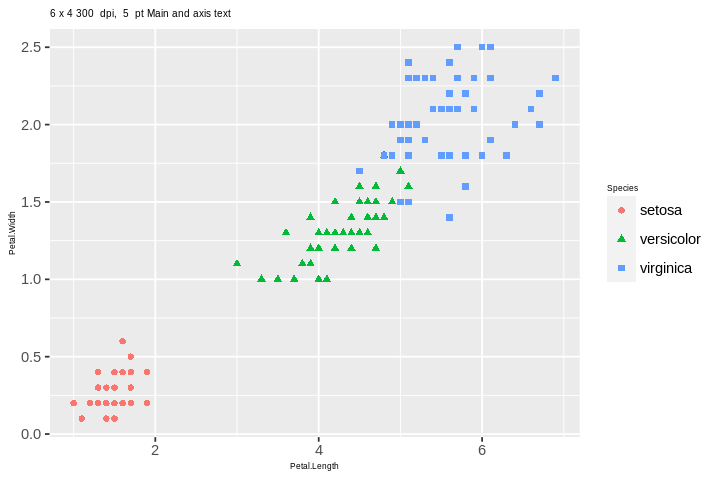

In [6]:
w = 6
h = 4
dpi = 300
text_size = 5
options(repr.plot.width=w, repr.plot.height=h)
title_text = paste(w, 'x', h, dpi ,' dpi, ', text_size, ' pt Main and axis text')

g = ggplot(iris, aes(Petal.Length, Petal.Width)) + 
    geom_point(aes(color=Species, shape=Species)) +
    ggtitle(title_text) + 
    theme(axis.title=element_text(size=text_size), 
          title=element_text(size=text_size))

fname = paste(dpi,'_',w,'x',h,'txt',text_size,'_plot.png')
ggsave(fname, dpi=dpi, width=w, height=h)
plot(g)

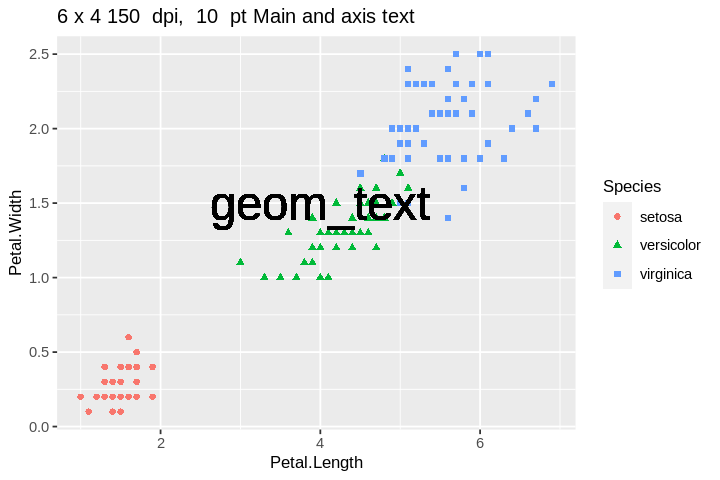

In [ ]:
# Dont forget geom_text uses different units, text size is in mm
g +  geom_text(x=4, y=1.5, label="geom_text", size=10, inherit.aes=FALSE)

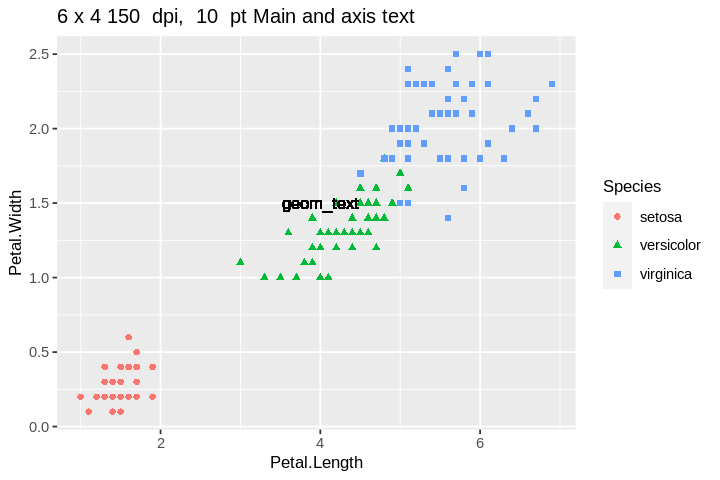

In [ ]:
# solution is to divide the size with a built in pt constant
g +  geom_text(x=4, y=1.5, label="geom_text", size=10/.pt, inherit.aes=FALSE)